## Tiền xử lý dữ liệu

In [ ]:
# Import thư viện cần thiết
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [416]:
# Tải dữ liệu bảng Lịch sử giá
df_price = pd.read_excel('Simplize_VNM_PriceHistory_20250315.xlsx', header=5, skipfooter=7)
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], format='%d/%m/%Y')
df_price = df_price.set_index('NGÀY')
df_price = df_price.sort_index(ascending=True)
df_price.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
NGÀY,,,,,,,
2021-03-15,84772.610441,84937.537699,84195.365040,84277.828668,NaN,NaN,2513500
2021-03-16,84277.828668,84360.292297,82546.092463,83288.265122,NaN,NaN,4314700
2021-03-17,83288.265122,83288.265122,82546.092463,82875.946978,NaN,NaN,3568400
2021-03-18,83288.265122,84525.219555,83288.265122,84525.219555,NaN,NaN,2608900
2021-03-19,84277.828668,84277.828668,83618.119638,83865.510524,NaN,NaN,3884100


In [417]:
# Tải dữ liệu bảng Chỉ số tài chính
df_financials = pd.read_excel('Simplize_VNM_FinancialIndicator_20250315.xlsx', header=6, index_col=0)
df_financials.index = df_financials.index.str.strip()
df_financials = df_financials.loc[['Lợi nhuận gộp', 
                                 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
                                 'P/E',
                                 'EPS (VNĐ/CP)',
                                 'Tăng trưởng EPS',
                                 'ROE LTM',
                                 'Nợ phải trả / Vốn chủ sở hữu',
                                 'Khả năng thanh toán tổng quát',
                                 'Vòng quay tài sản (vòng)',
                                 'Giá trị sổ sách (VNĐ/CP)'
                                 ]]

df_financials = df_financials.T
df_financials.index.name = 'Mốc thời gian'
df_financials.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CHỈ TIÊU,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Mốc thời gian,,,,,,,,,,
Q4/2024,6.209691e+12,2.123649e+12,14.158594,1016.121790,-0.0870,0.2655,0.5218,2.916559,0.274596,15444.740517
Q3/2024,6.401445e+12,2.403519e+12,15.690729,1150.033658,-0.0356,0.2789,0.6365,2.571104,0.277772,15010.407777
Q2/2024,7.067519e+12,2.670475e+12,14.974041,1277.766482,0.2145,0.2610,0.4136,3.417774,0.314712,16433.903215
Q1/2024,5.911521e+12,2.194667e+12,16.015323,1050.102274,0.1820,0.2649,0.4401,3.272074,0.270541,15241.554828
Q4/2023,6.441613e+12,2.326014e+12,17.170218,1112.949066,0.2444,0.2659,0.5038,2.984728,0.290201,15166.263368


In [418]:
def get_quarter_window(quarter_str):
    """
    Hàm này lấy một chuỗi quý (vd: 'Q4/2024') và trả về:
    1. end_date: Ngày cuối cùng thực tế của quý đó (vd: '2024-12-31')
    2. window_start: Ngày bắt đầu cửa sổ (end_date - 14 ngày)
    3. window_end: Ngày kết thúc cửa sổ (end_date + 14 ngày)
    """
    parts = quarter_str.split('/')
    quarter = parts[0].upper()
    year = int(parts[1])

    if quarter == 'Q1':
        end_date = pd.Timestamp(year=year, month=3, day=31)
    elif quarter == 'Q2':
        end_date = pd.Timestamp(year=year, month=6, day=30)
    elif quarter == 'Q3':
        end_date = pd.Timestamp(year=year, month=9, day=30)
    elif quarter == 'Q4':
        end_date = pd.Timestamp(year=year, month=12, day=31)
    else:
        return pd.NaT, pd.NaT, pd.NaT

    window_start = end_date - DateOffset(days=14)
    window_end = end_date + DateOffset(days=14)
    return end_date, window_start, window_end

In [419]:
# Tạo DataFrame mới để lưu trữ giá đóng cửa trung bình theo quý
price_data = []

for quarter_str in df_financials.index:
    end_date, window_start, window_end = get_quarter_window(quarter_str)
    daily_prices_in_window = df_price.loc[window_start:window_end]
    if not daily_prices_in_window.empty:
        avg_price = pd.to_numeric(daily_prices_in_window['GIÁ ĐÓNG CỬA']).mean()
        price_data.append({
            'Mốc thời gian': quarter_str,
            'Giá đóng cửa (TB Quý)': avg_price,
            'Sort': end_date
        })

df_quarter = pd.DataFrame(price_data)
df_quarter = df_quarter.set_index('Mốc thời gian')
df_quarter.head()

,Giá đóng cửa (TB Quý),Sort
Mốc thời gian,,
Q4/2024,63009.805901,2024-12-31
Q3/2024,68946.070134,2024-09-30
Q2/2024,63416.142025,2024-06-30
Q1/2024,64681.875864,2024-03-31
Q4/2023,64148.819394,2023-12-31


In [420]:
# Kết hợp dữ liệu tài chính với giá đóng cửa trung bình theo quý
df_final = df_financials.join(df_quarter, how='inner')
df_final = df_final.sort_values(by='Sort')
df_final['Thay đổi giá (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].diff()
df_final['% Thay đổi (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].pct_change()
df_final = df_final.drop(columns=['Sort'])
df_final.head()

,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP),Giá đóng cửa (TB Quý),Thay đổi giá (theo Quý),% Thay đổi (theo Quý)
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,5.754880e+12,2.575917e+12,20.118611,1232.522246,-0.2237,0.3340,0.5031,2.987675,0.265175,14991.714940,82612.848734,NaN,NaN
Q2/2021,6.854357e+12,2.834789e+12,17.585604,1356.387309,-0.0773,0.3247,0.5432,2.841081,0.301943,15131.730828,74468.890182,-8143.958552,-0.098580
Q3/2021,6.943747e+12,2.925767e+12,17.075221,1399.918360,-0.0493,0.3250,0.5371,2.861992,0.308122,14878.973056,75974.192967,1505.302784,0.020214
Q4/2021,6.725317e+12,2.196004e+12,17.579105,1050.742247,0.0050,0.3060,0.4876,3.050653,0.300171,15829.657489,72629.578087,-3344.614879,-0.044023
Q1/2022,5.624804e+12,2.265518e+12,16.072799,1084.003056,-0.1205,0.2994,0.5151,2.941203,0.261038,15406.049350,66900.806282,-5728.771805,-0.078877


## Phân tích dữ liệu

In [421]:
# Đổi tên cột để dễ dàng hơn cho phân tích
rename_dict = {
    'Lợi nhuận gộp': 'gross_profit',
    'Lợi nhuận sau thuế của Cổ đông công ty mẹ': 'net_income',
    'P/E': 'pe',
    'EPS (VNĐ/CP)': 'eps',
    'Tăng trưởng EPS': 'eps_growth',
    'ROE LTM': 'roe',
    'Nợ phải trả / Vốn chủ sở hữu': 'de_ratio',
    'Khả năng thanh toán tổng quát': 'current_ratio',
    'Vòng quay tài sản (vòng)': 'asset_turnover',
    'Giá trị sổ sách (VNĐ/CP)': 'book_value',
    'Giá đóng cửa (TB Quý)': 'close_avg',
    'Thay đổi giá (theo Quý)': 'price_change',
    '% Thay đổi (theo Quý)': 'pct_change'
}
df_final = df_final.rename(columns=rename_dict)
df_final.head()

,gross_profit,net_income,pe,eps,eps_growth,roe,de_ratio,current_ratio,asset_turnover,book_value,close_avg,price_change,pct_change
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,5.754880e+12,2.575917e+12,20.118611,1232.522246,-0.2237,0.3340,0.5031,2.987675,0.265175,14991.714940,82612.848734,NaN,NaN
Q2/2021,6.854357e+12,2.834789e+12,17.585604,1356.387309,-0.0773,0.3247,0.5432,2.841081,0.301943,15131.730828,74468.890182,-8143.958552,-0.098580
Q3/2021,6.943747e+12,2.925767e+12,17.075221,1399.918360,-0.0493,0.3250,0.5371,2.861992,0.308122,14878.973056,75974.192967,1505.302784,0.020214
Q4/2021,6.725317e+12,2.196004e+12,17.579105,1050.742247,0.0050,0.3060,0.4876,3.050653,0.300171,15829.657489,72629.578087,-3344.614879,-0.044023
Q1/2022,5.624804e+12,2.265518e+12,16.072799,1084.003056,-0.1205,0.2994,0.5151,2.941203,0.261038,15406.049350,66900.806282,-5728.771805,-0.078877


### Thống kê mô tả

In [422]:
print(df_final.describe().to_markdown(floatfmt=",.2f"))

|       |         gross_profit |           net_income |    pe |      eps |   eps_growth |   roe |   de_ratio |   current_ratio |   asset_turnover |   book_value |   close_avg |   price_change |   pct_change |
|:------|---------------------:|---------------------:|------:|---------:|-------------:|------:|-----------:|----------------:|-----------------:|-------------:|------------:|---------------:|-------------:|
| count |                16.00 |                16.00 | 16.00 |    16.00 |        16.00 | 16.00 |      16.00 |           16.00 |            16.00 |        16.00 |       16.00 |          15.00 |        15.00 |
| mean  | 6,269,402,558,596.75 | 2,332,163,972,959.56 | 16.96 | 1,115.89 |        -0.04 |  0.28 |       0.50 |            3.04 |             0.29 |    15,300.36 |   68,659.17 |      -1,306.87 |        -0.02 |
| std   |   488,470,165,163.55 |   307,293,926,641.38 |  1.68 |   147.03 |         0.16 |  0.03 |       0.07 |            0.27 |             0.02 |       590.38 |  

In [423]:
print(df_final.var().to_frame(name='Variance').to_markdown(floatfmt=",.2f"))

|                |                           Variance |
|:---------------|-----------------------------------:|
| gross_profit   | 238,603,102,254,910,698,160,128.00 |
| net_income     |  94,429,557,350,678,052,995,072.00 |
| pe             |                               2.82 |
| eps            |                          21,618.92 |
| eps_growth     |                               0.03 |
| roe            |                               0.00 |
| de_ratio       |                               0.00 |
| current_ratio  |                               0.07 |
| asset_turnover |                               0.00 |
| book_value     |                         348,547.49 |
| close_avg      |                      32,142,225.51 |
| price_change   |                      24,891,211.00 |
| pct_change     |                               0.01 |


### Vẽ biểu đồ biến động 

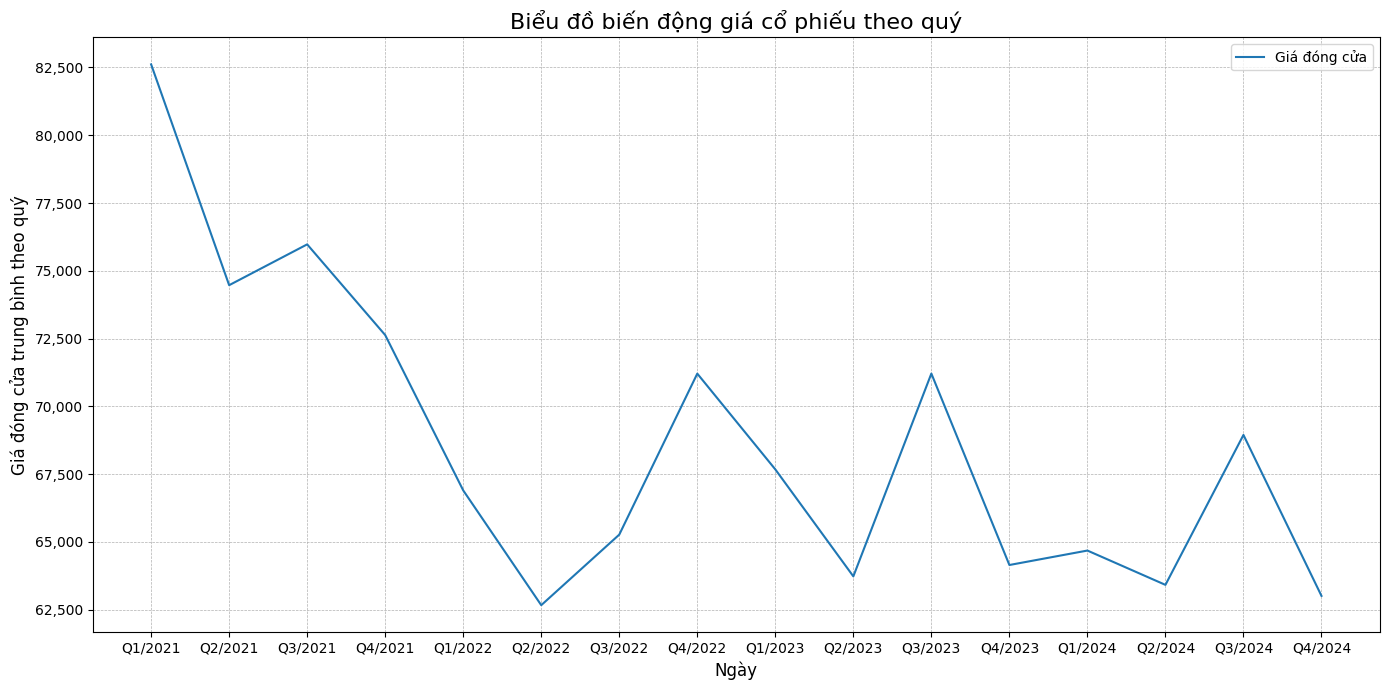

In [424]:
plt.figure(figsize=(14, 7))
plt.plot(df_final.index, df_final['close_avg'], label='Giá đóng cửa')

plt.title('Biểu đồ biến động giá cổ phiếu theo quý', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa trung bình theo quý', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

### Tương quan giữa các chỉ số tài chính

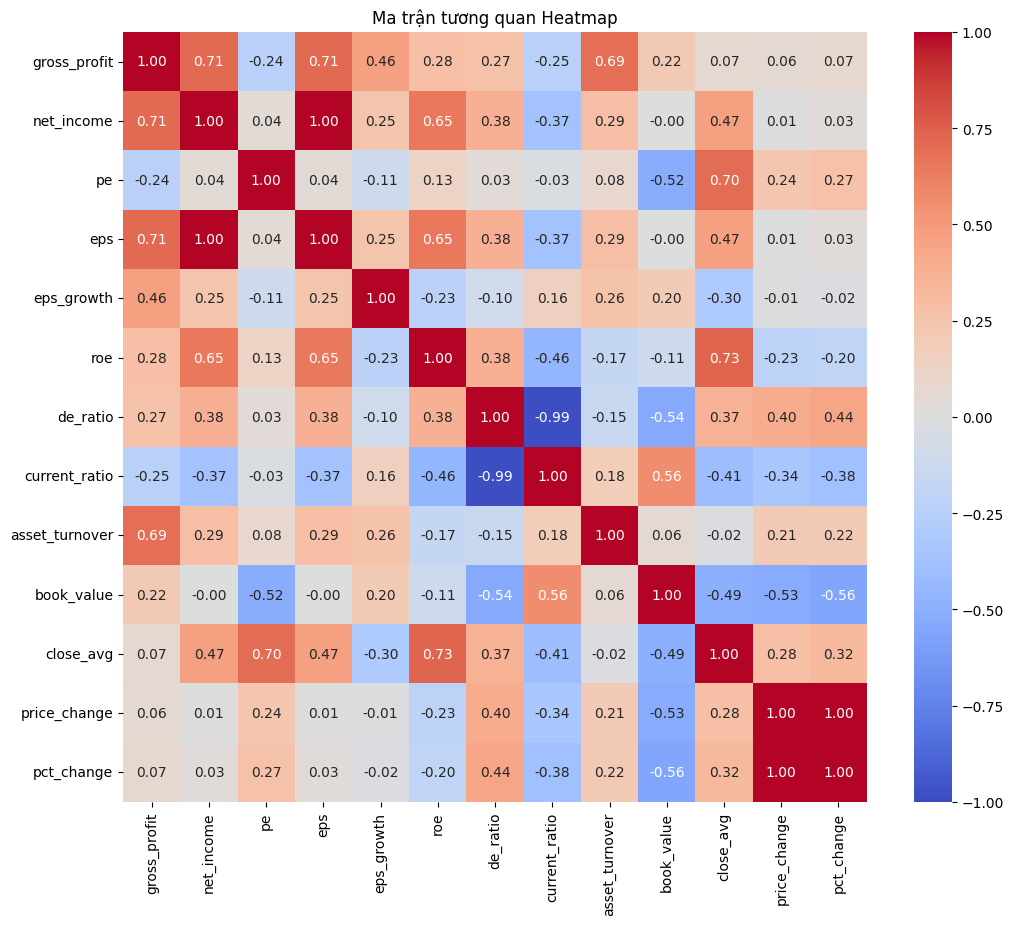

In [425]:
correlation_matrix = df_final.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Heatmap')
plt.show()

In [426]:
# Tương quan các chỉ số với giá đóng cửa trung bình theo quý
price_correlation = correlation_matrix['close_avg'].sort_values(ascending=False)
price_correlation

close_avg         1.000000
roe               0.726923
pe                0.701902
eps               0.466881
net_income        0.466881
de_ratio          0.372638
pct_change        0.324153
price_change      0.282670
gross_profit      0.069991
asset_turnover   -0.020960
eps_growth       -0.304682
current_ratio    -0.406922
book_value       -0.493782
Name: close_avg, dtype: float64

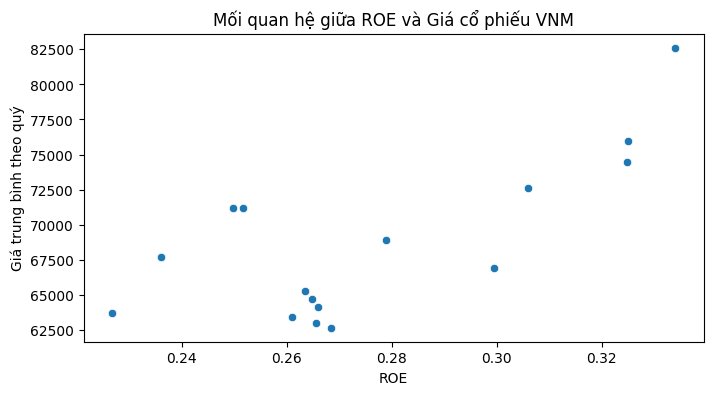

In [427]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_final, x='roe', y='close_avg')
plt.title('Mối quan hệ giữa ROE và Giá cổ phiếu VNM')
plt.xlabel('ROE')
plt.ylabel('Giá trung bình theo quý')
plt.show()